In [1]:
%cd ../
%matplotlib inline

/home/zulqarnain/bugfix/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.utils as utils

In [3]:
import glob

data_files = glob.glob('/home/zulqarnain/bugfix/HTFATorch/notebooks/*.mat')

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(data_files, num_factors=5)

In [6]:
prior_sample, _ = htfa.sample(posterior_predictive=False)

for s in range(htfa.num_subjects):
    logging.info('Prior Reconstruction Error (Frobenius Norm) for subject %d: %.8e', s,
        np.linalg.norm(
            prior_sample['Y%d' % s].value.data.cpu().numpy() - htfa.voxel_activations[s].numpy()
        )
    )

prior_sample

03/26/2018 23:31:03 Prior Reconstruction Error (Frobenius Norm) for subject 0: 4.95380829e+02
03/26/2018 23:31:03 Prior Reconstruction Error (Frobenius Norm) for subject 1: 4.95761871e+02


Trace{'template_factor_centers__mu': Normal([torch.FloatTensor of size 5x3]), 'template_factor_centers__sigma': Normal([torch.FloatTensor of size 5x3]), 'template_factor_log_widths__mu': Normal([torch.FloatTensor of size 5]), 'template_factor_log_widths__sigma': Normal([torch.FloatTensor of size 5]), 'template_weights__mu__mu': Normal([torch.FloatTensor of size 5]), 'template_weights__mu__sigma': Normal([torch.FloatTensor of size 5]), 'template_weights__sigma__mu': Normal([torch.FloatTensor of size 5]), 'template_weights__sigma__sigma': Normal([torch.FloatTensor of size 5]), 'voxel_noise': Normal([torch.FloatTensor of size 2]), 'subject_weights_mu': Normal([torch.FloatTensor of size 2x5]), 'subject_weights_sigma': Normal([torch.FloatTensor of size 2x5]), 'Weights0': Normal([torch.FloatTensor of size 300x5]), 'FactorCenters0': Normal([torch.FloatTensor of size 5x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 5]), 'Weights1': Normal([torch.FloatTensor of size 300x5]), 'Factor

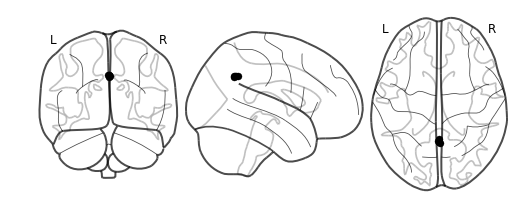

In [7]:
htfa.plot_factor_centers(trace=prior_sample)

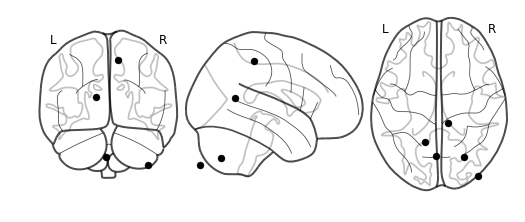

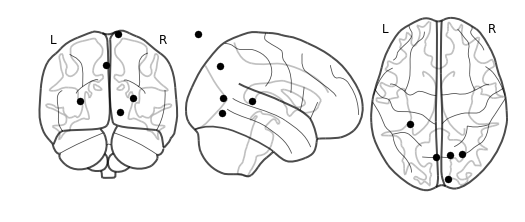

In [8]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s, trace=prior_sample)

In [9]:
del prior_sample

In [10]:
variational_sample, _ = htfa.sample(posterior_predictive=True)

for s in range(htfa.num_subjects):
    logging.info('Prior Reconstruction Error (Frobenius Norm) for subject %d: %.8e', s,
        np.linalg.norm(
            variational_sample['Y%d' % s].value.data.cpu().numpy() -
            htfa.voxel_activations[s].numpy()
        )
    )

variational_sample

03/26/2018 23:31:10 Prior Reconstruction Error (Frobenius Norm) for subject 0: 4.95931885e+02
03/26/2018 23:31:10 Prior Reconstruction Error (Frobenius Norm) for subject 1: 4.95814545e+02


Trace{'template_factor_centers__mu': Normal([torch.FloatTensor of size 1x5x3]), 'template_factor_centers__sigma': Normal([torch.FloatTensor of size 1x5x3]), 'template_factor_log_widths__mu': Normal([torch.FloatTensor of size 1x5]), 'template_factor_log_widths__sigma': Normal([torch.FloatTensor of size 1x5]), 'template_weights__mu__mu': Normal([torch.FloatTensor of size 1x5]), 'template_weights__mu__sigma': Normal([torch.FloatTensor of size 1x5]), 'template_weights__sigma__mu': Normal([torch.FloatTensor of size 1x5]), 'template_weights__sigma__sigma': Normal([torch.FloatTensor of size 1x5]), 'voxel_noise': Normal([torch.FloatTensor of size 1x2]), 'subject_weights_mu': Normal([torch.FloatTensor of size 1x2x5]), 'subject_weights_sigma': Normal([torch.FloatTensor of size 1x2x5]), 'Weights0': Normal([torch.FloatTensor of size 1x300x5]), 'FactorCenters0': Normal([torch.FloatTensor of size 1x5x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 1x5]), 'Weights1': Normal([torch.FloatTen

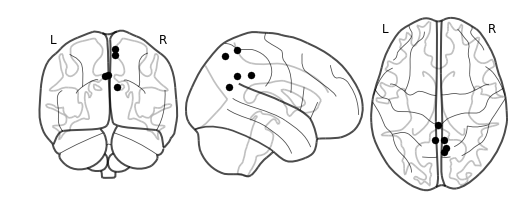

In [11]:
htfa.plot_factor_centers(trace=variational_sample)

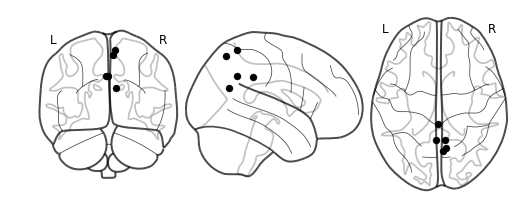

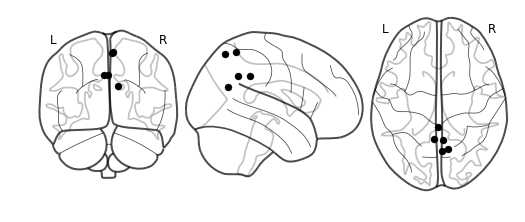

In [12]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s, trace=variational_sample)

In [13]:
del variational_sample

In [14]:
losses = htfa.train(num_steps=1000, learning_rate=1e-1, log_level=logging.INFO, num_particles=4,
                    use_cuda=True)

03/26/2018 23:31:20 [Epoch 1] (194ms) Posterior free-energy 5.42500720e+07
03/26/2018 23:31:20 [Epoch 2] (34ms) Posterior free-energy 2.38140200e+07
03/26/2018 23:31:20 [Epoch 3] (34ms) Posterior free-energy 2.38796000e+07
03/26/2018 23:31:20 [Epoch 4] (33ms) Posterior free-energy 2.36753400e+07
03/26/2018 23:31:20 [Epoch 5] (34ms) Posterior free-energy 2.41073480e+07
03/26/2018 23:31:20 [Epoch 6] (31ms) Posterior free-energy 2.37306320e+07
03/26/2018 23:31:20 [Epoch 7] (31ms) Posterior free-energy 2.36819880e+07
03/26/2018 23:31:20 [Epoch 8] (31ms) Posterior free-energy 2.36599840e+07
03/26/2018 23:31:20 [Epoch 9] (29ms) Posterior free-energy 2.42207920e+07
03/26/2018 23:31:20 [Epoch 10] (30ms) Posterior free-energy 2.36571460e+07
03/26/2018 23:31:20 [Epoch 11] (31ms) Posterior free-energy 2.36554980e+07
03/26/2018 23:31:20 [Epoch 12] (30ms) Posterior free-energy 2.36542400e+07
03/26/2018 23:31:20 [Epoch 13] (30ms) Posterior free-energy 2.36604220e+07
03/26/2018 23:31:20 [Epoch 14] (2

03/26/2018 23:31:23 [Epoch 111] (28ms) Posterior free-energy 1.02858910e+07
03/26/2018 23:31:23 [Epoch 112] (26ms) Posterior free-energy 1.27464490e+07
03/26/2018 23:31:23 [Epoch 113] (27ms) Posterior free-energy 1.11282200e+07
03/26/2018 23:31:23 [Epoch 114] (27ms) Posterior free-energy 1.14895470e+07
03/26/2018 23:31:23 [Epoch 115] (27ms) Posterior free-energy 1.27286680e+07
03/26/2018 23:31:23 [Epoch 116] (27ms) Posterior free-energy 1.09559060e+07
03/26/2018 23:31:23 [Epoch 117] (28ms) Posterior free-energy 1.08556230e+07
03/26/2018 23:31:23 [Epoch 118] (27ms) Posterior free-energy 1.31435390e+07
03/26/2018 23:31:23 [Epoch 119] (29ms) Posterior free-energy 1.31545970e+07
03/26/2018 23:31:23 [Epoch 120] (26ms) Posterior free-energy 1.16228630e+07
03/26/2018 23:31:23 [Epoch 121] (26ms) Posterior free-energy 1.22960500e+07
03/26/2018 23:31:23 [Epoch 122] (25ms) Posterior free-energy 1.32609080e+07
03/26/2018 23:31:23 [Epoch 123] (25ms) Posterior free-energy 1.25652140e+07
03/26/2018 2

03/26/2018 23:31:26 [Epoch 219] (26ms) Posterior free-energy 7.52965850e+06
03/26/2018 23:31:26 [Epoch 220] (26ms) Posterior free-energy 7.51132050e+06
03/26/2018 23:31:26 [Epoch 221] (27ms) Posterior free-energy 7.50065500e+06
03/26/2018 23:31:26 [Epoch 222] (27ms) Posterior free-energy 7.51105500e+06
03/26/2018 23:31:26 [Epoch 223] (26ms) Posterior free-energy 8.40488100e+06
03/26/2018 23:31:27 [Epoch 224] (28ms) Posterior free-energy 7.47492800e+06
03/26/2018 23:31:27 [Epoch 225] (27ms) Posterior free-energy 7.46686500e+06
03/26/2018 23:31:27 [Epoch 226] (27ms) Posterior free-energy 7.47264350e+06
03/26/2018 23:31:27 [Epoch 227] (26ms) Posterior free-energy 7.46163750e+06
03/26/2018 23:31:27 [Epoch 228] (29ms) Posterior free-energy 8.64842100e+06
03/26/2018 23:31:27 [Epoch 229] (27ms) Posterior free-energy 7.47175650e+06
03/26/2018 23:31:27 [Epoch 230] (26ms) Posterior free-energy 7.48560100e+06
03/26/2018 23:31:27 [Epoch 231] (26ms) Posterior free-energy 7.45730600e+06
03/26/2018 2

03/26/2018 23:31:29 [Epoch 327] (26ms) Posterior free-energy 6.97105400e+06
03/26/2018 23:31:29 [Epoch 328] (26ms) Posterior free-energy 6.98086900e+06
03/26/2018 23:31:29 [Epoch 329] (26ms) Posterior free-energy 6.91683050e+06
03/26/2018 23:31:29 [Epoch 330] (27ms) Posterior free-energy 6.92160750e+06
03/26/2018 23:31:30 [Epoch 331] (27ms) Posterior free-energy 6.91700800e+06
03/26/2018 23:31:30 [Epoch 332] (27ms) Posterior free-energy 6.92444650e+06
03/26/2018 23:31:30 [Epoch 333] (27ms) Posterior free-energy 6.93084050e+06
03/26/2018 23:31:30 [Epoch 334] (27ms) Posterior free-energy 6.92875500e+06
03/26/2018 23:31:30 [Epoch 335] (28ms) Posterior free-energy 6.97516550e+06
03/26/2018 23:31:30 [Epoch 336] (27ms) Posterior free-energy 6.96200550e+06
03/26/2018 23:31:30 [Epoch 337] (26ms) Posterior free-energy 6.92496050e+06
03/26/2018 23:31:30 [Epoch 338] (28ms) Posterior free-energy 6.91021600e+06
03/26/2018 23:31:30 [Epoch 339] (27ms) Posterior free-energy 6.92902050e+06
03/26/2018 2

03/26/2018 23:31:33 [Epoch 435] (35ms) Posterior free-energy 1.12326530e+07
03/26/2018 23:31:33 [Epoch 436] (33ms) Posterior free-energy 1.12935240e+07
03/26/2018 23:31:33 [Epoch 437] (35ms) Posterior free-energy 1.08657360e+07
03/26/2018 23:31:33 [Epoch 438] (34ms) Posterior free-energy 1.06586540e+07
03/26/2018 23:31:33 [Epoch 439] (33ms) Posterior free-energy 1.01415420e+07
03/26/2018 23:31:33 [Epoch 440] (32ms) Posterior free-energy 9.56032300e+06
03/26/2018 23:31:33 [Epoch 441] (31ms) Posterior free-energy 9.25234000e+06
03/26/2018 23:31:33 [Epoch 442] (31ms) Posterior free-energy 8.84948300e+06
03/26/2018 23:31:33 [Epoch 443] (33ms) Posterior free-energy 8.70257500e+06
03/26/2018 23:31:33 [Epoch 444] (30ms) Posterior free-energy 8.46044300e+06
03/26/2018 23:31:33 [Epoch 445] (35ms) Posterior free-energy 8.38867700e+06
03/26/2018 23:31:33 [Epoch 446] (34ms) Posterior free-energy 8.17619750e+06
03/26/2018 23:31:33 [Epoch 447] (34ms) Posterior free-energy 8.09374800e+06
03/26/2018 2

03/26/2018 23:31:37 [Epoch 543] (39ms) Posterior free-energy 7.00321050e+06
03/26/2018 23:31:37 [Epoch 544] (34ms) Posterior free-energy 6.94895900e+06
03/26/2018 23:31:37 [Epoch 545] (32ms) Posterior free-energy 6.87710350e+06
03/26/2018 23:31:37 [Epoch 546] (35ms) Posterior free-energy 6.82123100e+06
03/26/2018 23:31:37 [Epoch 547] (34ms) Posterior free-energy 6.86224500e+06
03/26/2018 23:31:37 [Epoch 548] (33ms) Posterior free-energy 6.86812600e+06
03/26/2018 23:31:37 [Epoch 549] (35ms) Posterior free-energy 6.81645900e+06
03/26/2018 23:31:37 [Epoch 550] (34ms) Posterior free-energy 6.81479900e+06
03/26/2018 23:31:37 [Epoch 551] (35ms) Posterior free-energy 6.86059100e+06
03/26/2018 23:31:37 [Epoch 552] (35ms) Posterior free-energy 6.88510400e+06
03/26/2018 23:31:37 [Epoch 553] (35ms) Posterior free-energy 6.88459750e+06
03/26/2018 23:31:37 [Epoch 554] (34ms) Posterior free-energy 6.95533300e+06
03/26/2018 23:31:37 [Epoch 555] (35ms) Posterior free-energy 6.94185900e+06
03/26/2018 2

03/26/2018 23:31:41 [Epoch 651] (27ms) Posterior free-energy 6.65983200e+06
03/26/2018 23:31:41 [Epoch 652] (26ms) Posterior free-energy 6.58635300e+06
03/26/2018 23:31:41 [Epoch 653] (27ms) Posterior free-energy 6.58096250e+06
03/26/2018 23:31:41 [Epoch 654] (27ms) Posterior free-energy 6.56988550e+06
03/26/2018 23:31:41 [Epoch 655] (27ms) Posterior free-energy 6.59755750e+06
03/26/2018 23:31:41 [Epoch 656] (26ms) Posterior free-energy 6.59575500e+06
03/26/2018 23:31:41 [Epoch 657] (27ms) Posterior free-energy 6.68358650e+06
03/26/2018 23:31:41 [Epoch 658] (27ms) Posterior free-energy 6.64869000e+06
03/26/2018 23:31:41 [Epoch 659] (26ms) Posterior free-energy 6.67750550e+06
03/26/2018 23:31:41 [Epoch 660] (27ms) Posterior free-energy 6.64183100e+06
03/26/2018 23:31:41 [Epoch 661] (27ms) Posterior free-energy 6.73403550e+06
03/26/2018 23:31:41 [Epoch 662] (27ms) Posterior free-energy 6.66031150e+06
03/26/2018 23:31:41 [Epoch 663] (28ms) Posterior free-energy 6.65318250e+06
03/26/2018 2

03/26/2018 23:31:44 [Epoch 759] (25ms) Posterior free-energy 6.63891650e+06
03/26/2018 23:31:44 [Epoch 760] (29ms) Posterior free-energy 6.67208650e+06
03/26/2018 23:31:44 [Epoch 761] (26ms) Posterior free-energy 6.61149200e+06
03/26/2018 23:31:44 [Epoch 762] (26ms) Posterior free-energy 6.55220100e+06
03/26/2018 23:31:44 [Epoch 763] (27ms) Posterior free-energy 6.62043100e+06
03/26/2018 23:31:44 [Epoch 764] (27ms) Posterior free-energy 6.62261150e+06
03/26/2018 23:31:44 [Epoch 765] (26ms) Posterior free-energy 6.60817750e+06
03/26/2018 23:31:44 [Epoch 766] (27ms) Posterior free-energy 6.55182300e+06
03/26/2018 23:31:44 [Epoch 767] (27ms) Posterior free-energy 6.63634600e+06
03/26/2018 23:31:44 [Epoch 768] (26ms) Posterior free-energy 6.64094800e+06
03/26/2018 23:31:44 [Epoch 769] (27ms) Posterior free-energy 6.56074800e+06
03/26/2018 23:31:44 [Epoch 770] (27ms) Posterior free-energy 6.61154800e+06
03/26/2018 23:31:44 [Epoch 771] (26ms) Posterior free-energy 6.55214550e+06
03/26/2018 2

03/26/2018 23:31:47 [Epoch 867] (34ms) Posterior free-energy 6.56909500e+06
03/26/2018 23:31:47 [Epoch 868] (34ms) Posterior free-energy 6.54212900e+06
03/26/2018 23:31:47 [Epoch 869] (34ms) Posterior free-energy 6.55191900e+06
03/26/2018 23:31:47 [Epoch 870] (33ms) Posterior free-energy 6.54987150e+06
03/26/2018 23:31:47 [Epoch 871] (33ms) Posterior free-energy 6.56427300e+06
03/26/2018 23:31:47 [Epoch 872] (32ms) Posterior free-energy 6.56838800e+06
03/26/2018 23:31:47 [Epoch 873] (30ms) Posterior free-energy 6.60318400e+06
03/26/2018 23:31:47 [Epoch 874] (31ms) Posterior free-energy 6.65882850e+06
03/26/2018 23:31:48 [Epoch 875] (31ms) Posterior free-energy 6.63545150e+06
03/26/2018 23:31:48 [Epoch 876] (34ms) Posterior free-energy 6.58037700e+06
03/26/2018 23:31:48 [Epoch 877] (32ms) Posterior free-energy 6.62480250e+06
03/26/2018 23:31:48 [Epoch 878] (33ms) Posterior free-energy 6.61017500e+06
03/26/2018 23:31:48 [Epoch 879] (34ms) Posterior free-energy 6.64816050e+06
03/26/2018 2

03/26/2018 23:31:51 [Epoch 975] (39ms) Posterior free-energy 6.50935100e+06
03/26/2018 23:31:51 [Epoch 976] (39ms) Posterior free-energy 6.45875350e+06
03/26/2018 23:31:51 [Epoch 977] (36ms) Posterior free-energy 6.49335600e+06
03/26/2018 23:31:51 [Epoch 978] (49ms) Posterior free-energy 6.53181400e+06
03/26/2018 23:31:51 [Epoch 979] (52ms) Posterior free-energy 6.51295450e+06
03/26/2018 23:31:51 [Epoch 980] (44ms) Posterior free-energy 6.51205750e+06
03/26/2018 23:31:51 [Epoch 981] (41ms) Posterior free-energy 6.47997500e+06
03/26/2018 23:31:51 [Epoch 982] (38ms) Posterior free-energy 6.54141400e+06
03/26/2018 23:31:51 [Epoch 983] (50ms) Posterior free-energy 6.45985450e+06
03/26/2018 23:31:51 [Epoch 984] (45ms) Posterior free-energy 6.53515550e+06
03/26/2018 23:31:51 [Epoch 985] (40ms) Posterior free-energy 6.51052150e+06
03/26/2018 23:31:51 [Epoch 986] (38ms) Posterior free-energy 6.63855950e+06
03/26/2018 23:31:51 [Epoch 987] (36ms) Posterior free-energy 6.56424550e+06
03/26/2018 2

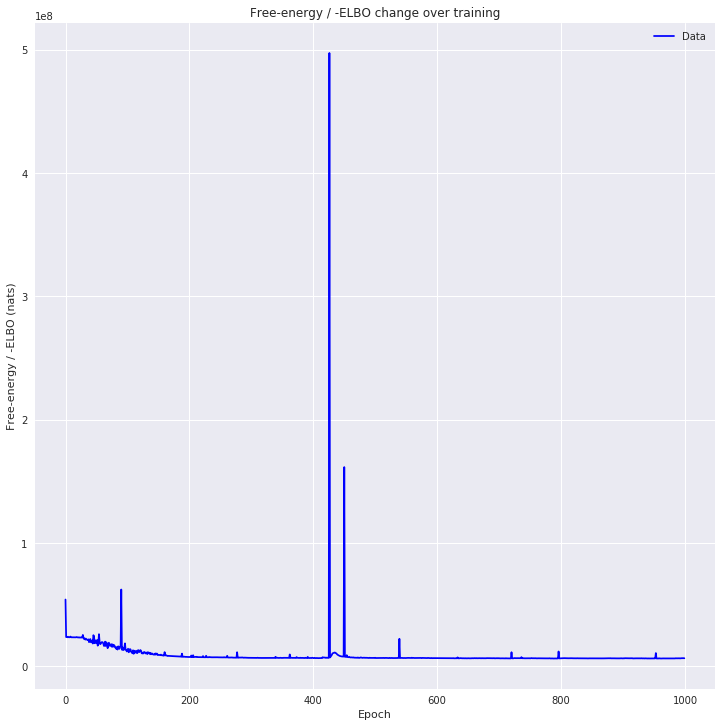

In [15]:
utils.plot_losses(losses)

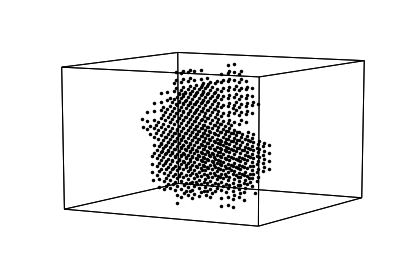

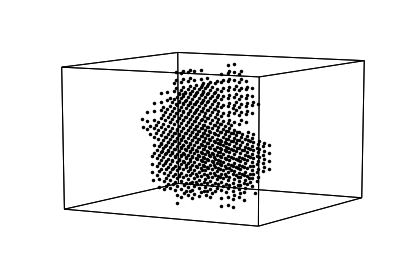

In [16]:
htfa.plot_voxels()

In [17]:
posterior_sample, q = htfa.sample(posterior_predictive=True)

for s in range(htfa.num_subjects):
    logging.info('Posterior Reconstruction Error (Frobenius Norm) for subject %d: %.8e', s,
        np.linalg.norm(
            posterior_sample['Y%d' % s].value.data.cpu().numpy() - htfa.voxel_activations[s].numpy()
        )
    )

posterior_sample

03/26/2018 23:31:59 Posterior Reconstruction Error (Frobenius Norm) for subject 0: 2.90496613e+02
03/26/2018 23:31:59 Posterior Reconstruction Error (Frobenius Norm) for subject 1: 2.55766724e+02


Trace{'template_factor_centers__mu': Normal([torch.FloatTensor of size 1x5x3]), 'template_factor_centers__sigma': Normal([torch.FloatTensor of size 1x5x3]), 'template_factor_log_widths__mu': Normal([torch.FloatTensor of size 1x5]), 'template_factor_log_widths__sigma': Normal([torch.FloatTensor of size 1x5]), 'template_weights__mu__mu': Normal([torch.FloatTensor of size 1x5]), 'template_weights__mu__sigma': Normal([torch.FloatTensor of size 1x5]), 'template_weights__sigma__mu': Normal([torch.FloatTensor of size 1x5]), 'template_weights__sigma__sigma': Normal([torch.FloatTensor of size 1x5]), 'voxel_noise': Normal([torch.FloatTensor of size 1x2]), 'subject_weights_mu': Normal([torch.FloatTensor of size 1x2x5]), 'subject_weights_sigma': Normal([torch.FloatTensor of size 1x2x5]), 'Weights0': Normal([torch.FloatTensor of size 1x300x5]), 'FactorCenters0': Normal([torch.FloatTensor of size 1x5x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 1x5]), 'Weights1': Normal([torch.FloatTen

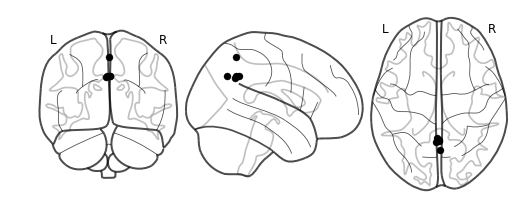

In [18]:
htfa.plot_factor_centers(trace=posterior_sample)

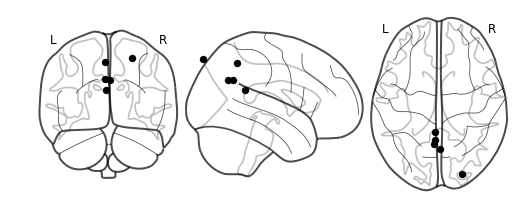

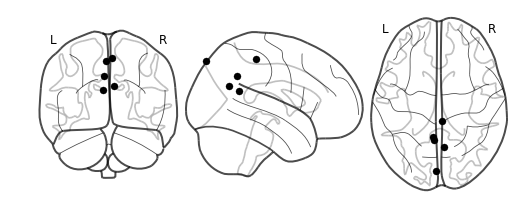

In [19]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s, trace=posterior_sample)